<a href="https://colab.research.google.com/github/moz50/-Housing_Price_Predictions_with_Melbourne_Akbank/blob/main/Housing_Price_Predictions_with_Melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MEHMET ALİ ÖZ , mehmet.ali50@hotmail.com , Discord : mr_m0z

 Importing Modules


In [2]:
import pandas as pd

Load Dataset

In [8]:
housing_df = pd.read_csv('melb_data.csv') # load file from csv .extension to be data frame
housing_df.head() # show the first 5 rows of data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
housing_df.shape

(34857, 21)

In [10]:
housing_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [11]:
housing_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [12]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [13]:
housing_df.isna().values.any()

True

In [14]:
housing_df[housing_df.duplicated(keep=False)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [15]:
housing_df.duplicated().value_counts()

False    34856
True         1
dtype: int64

In [16]:
housing_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [17]:
housing_df.corr()

<ipython-input-17-efd18c3aa5ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_df.corr()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<ipython-input-19-23e3884b07d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=housing_df.corr())


<Axes: >

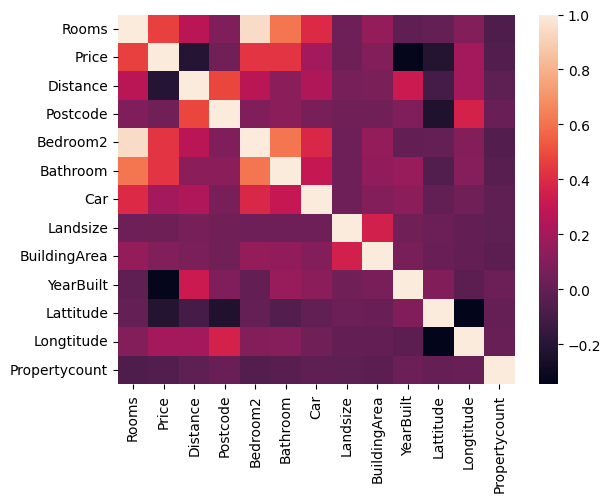

In [19]:
sns.heatmap(data=housing_df.corr())

In [20]:
housing_df['Rooms'].value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

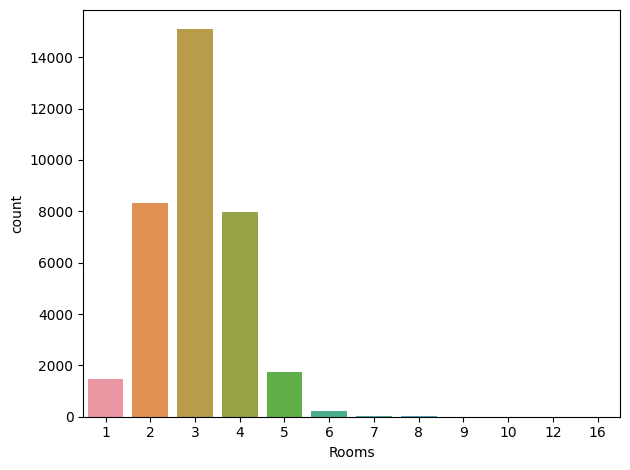

In [21]:
sns.countplot(data=housing_df, x='Rooms') # visualization using Bar plot with seaborn (colorized)
plt.tight_layout()

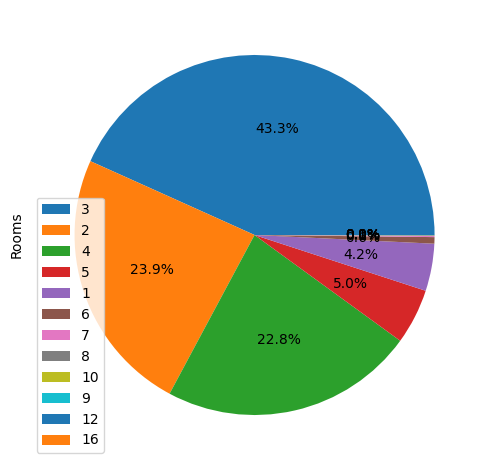

In [22]:
housing_df['Rooms'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True) # visualization using pie chart using percentage
plt.tight_layout()

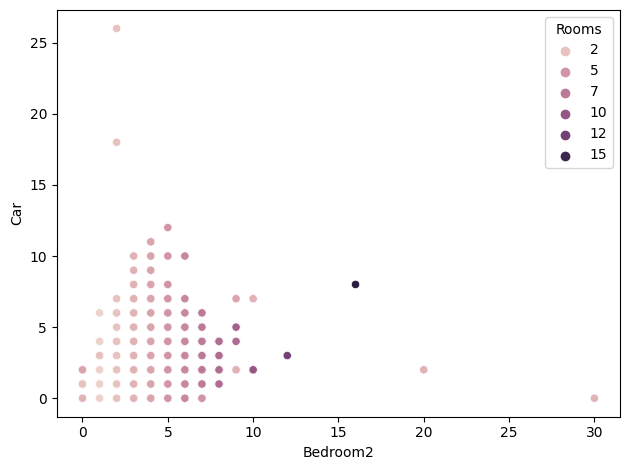

In [23]:
sns.scatterplot(x='Bedroom2', y='Car', data=housing_df, hue='Rooms') # visualization using Scatter Plot
plt.tight_layout()

In [24]:
housing_df.describe().loc['max', 'Landsize']

433014.0

In [25]:
housing_df = housing_df.dropna()

In [26]:
housing_df.shape

(8887, 21)

In [28]:
y = housing_df['Price']
y

2        1035000.0
4        1465000.0
6        1600000.0
11       1876000.0
14       1636000.0
           ...    
34847     500000.0
34849     570000.0
34853     888000.0
34854     705000.0
34856    1020000.0
Name: Price, Length: 8887, dtype: float64

In [29]:
y.describe()

count    8.887000e+03
mean     1.092902e+06
std      6.793819e+05
min      1.310000e+05
25%      6.410000e+05
50%      9.000000e+05
75%      1.345000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [30]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude'] # feature that we use to predict target
X = housing_df[features] # is Rooms, Bathroom, Landsize, Lattitude and Longitude
X

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
2,2,1.0,156.0,-37.80790,144.99340
4,3,2.0,134.0,-37.80930,144.99440
6,4,1.0,120.0,-37.80720,144.99410
11,3,2.0,245.0,-37.80240,144.99930
14,2,1.0,256.0,-37.80600,144.99540
...,...,...,...,...,...
34847,3,2.0,383.0,-37.61940,145.03951
34849,3,2.0,404.0,-37.61031,145.03393
34853,2,2.0,98.0,-37.81551,144.88826
34854,2,1.0,220.0,-37.82286,144.87856


In [31]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.646450,523.480365,-37.804501,144.991393
std,0.963786,0.721611,1061.324228,0.090549,0.118919
min,1.000000,1.000000,0.000000,-38.174360,144.423790
25%,2.000000,1.000000,212.000000,-37.858560,144.920000
50%,3.000000,2.000000,478.000000,-37.798700,144.998500
75%,4.000000,2.000000,652.000000,-37.748945,145.064560
max,12.000000,9.000000,42800.000000,-37.407200,145.526350


In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
housing_model = DecisionTreeRegressor(random_state=1)

In [34]:
housing_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [35]:
housing_model.predict(X.head())

array([1035000., 1465000., 1600000., 1876000., 1636000.])

In [36]:
y.head()

2     1035000.0
4     1465000.0
6     1600000.0
11    1876000.0
14    1636000.0
Name: Price, dtype: float64

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
y_hat = housing_model.predict(X) # predict house price from some features inside X variable
mean_absolute_error(y, y_hat)

897.2844229398746

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [41]:
housing_model = DecisionTreeRegressor(random_state=1)
housing_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [42]:
y_hat = housing_model.predict(X_test) # predict in X_test variable
mean_absolute_error(y_test, y_hat) # evaluate y_test with y_hat

257135.39873987398

In [43]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_hat)
    return mae

In [44]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    leaf_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f'Max leaf nodes: {max_leaf_nodes} \t Mean Absolute Error: {int(leaf_mae)}')

Max leaf nodes: 5 	 Mean Absolute Error: 384983
Max leaf nodes: 50 	 Mean Absolute Error: 269635
Max leaf nodes: 500 	 Mean Absolute Error: 234865
Max leaf nodes: 5000 	 Mean Absolute Error: 252795


In [45]:
from sklearn.ensemble import RandomForestRegressor # import Random Forest Regressor as Regressor

In [46]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=1) # n_estimators=100 means using 100 Decision Tree
rf_model.fit(X_train, y_train) # train data
y_hat = rf_model.predict(X_test) # predict data
print(f'Mean Absolute Error: {int(mean_absolute_error(y_test, y_hat))}') # MAE betweeen y_hat & y_test

Mean Absolute Error: 187106
